In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [64]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [65]:

df.info()  # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [66]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [67]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [68]:



# Check missing values in numerical columns
numerical = df.select_dtypes(include=['int64','float64']).isnull().sum()

# Check missing values in categorical columns
cat_missing = df.select_dtypes(exclude=['object']).isnull().sum()

print("Missing values in numerical columns:\n", numerical)
print("\nMissing values in categorical columns:\n", cat_missing)

Missing values in numerical columns:
 Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

Missing values in categorical columns:
 Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64


In [69]:

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

outliers = detect_outliers_iqr(df)

# Print detected outliers
for col, values in outliers.items():
    print(f"Outliers in '{col}':\n{values}\n")


Outliers in 'Age':
Series([], Name: Age, dtype: int64)

Outliers in 'RestingBP':
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
449      0
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64

Outliers in 'Cholesterol':
28     468
30     518
69     412
76     529
103    466
      ... 
535      0
536      0
616    564
667    417
796    409
Name: Cholesterol, Length: 183, dtype: int64

Outliers in 'FastingBS':
36     1
38     1
52     1
84     1
86     1
      ..
887    1
888    1
901    1
911    1
914    1
Name: FastingBS, Length: 214, dtype: int64

Outliers in 'MaxHR':
370    63
390    60
Name: MaxHR, dtype: int64

Outliers in 'Oldpeak':
68     4.0
166    5.0
324   -2.6
500    4.0
521    4.0
537    4.0
559    4.0
624    4.0
702    4.2
732    4.0
771    5.6
775   

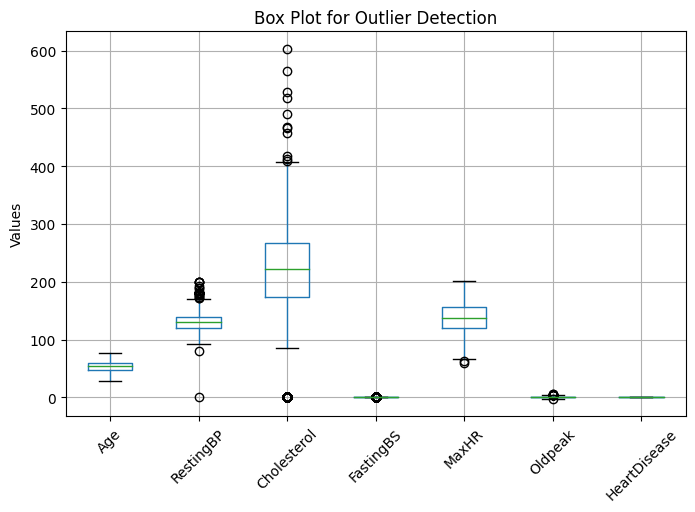

In [70]:
import matplotlib.pyplot as plt

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Box plot for outlier visualization
plt.figure(figsize=(8, 5))
df[numerical_columns].boxplot()  # Use df[numerical_columns] instead of df.boxplot(column=...)
plt.title("Box Plot for Outlier Detection")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


Skewness of each column:
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

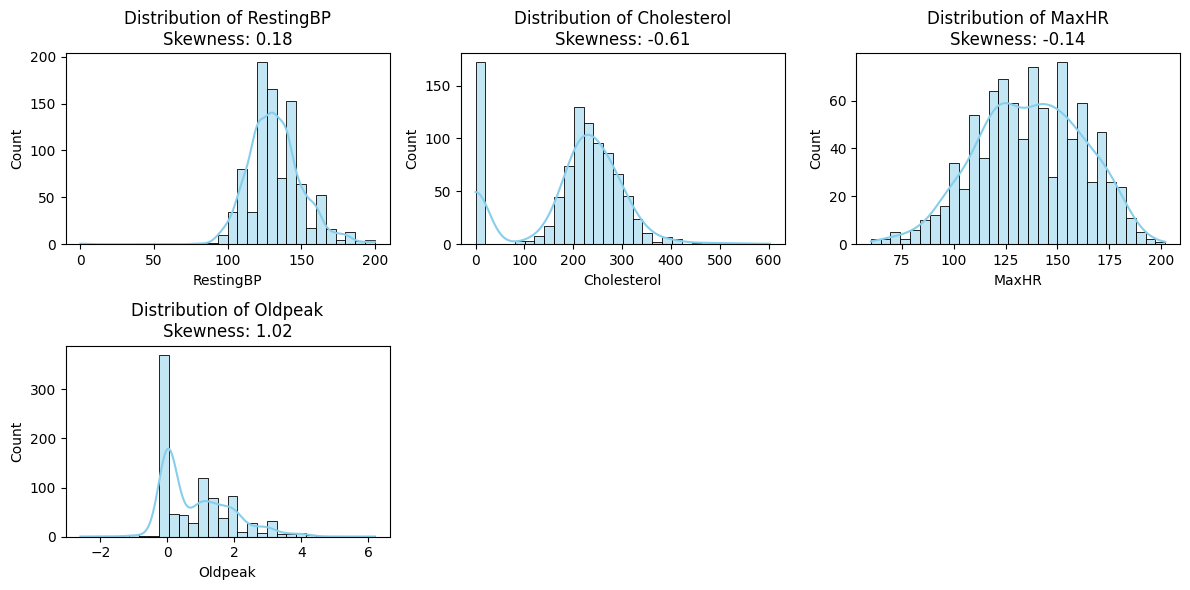

In [71]:
import seaborn as sns
# List of numerical columns to check for skewness
columns_to_check = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Calculate skewness for each column
skewness = df[columns_to_check].skew()

# Print skewness values
print("Skewness of each column:")
print(skewness)

# Visualize distribution using histograms
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}\nSkewness: {round(skewness[col], 2)}")

plt.tight_layout()
plt.show()

In [72]:
for col in ['RestingBP', 'Cholesterol', 'MaxHR']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


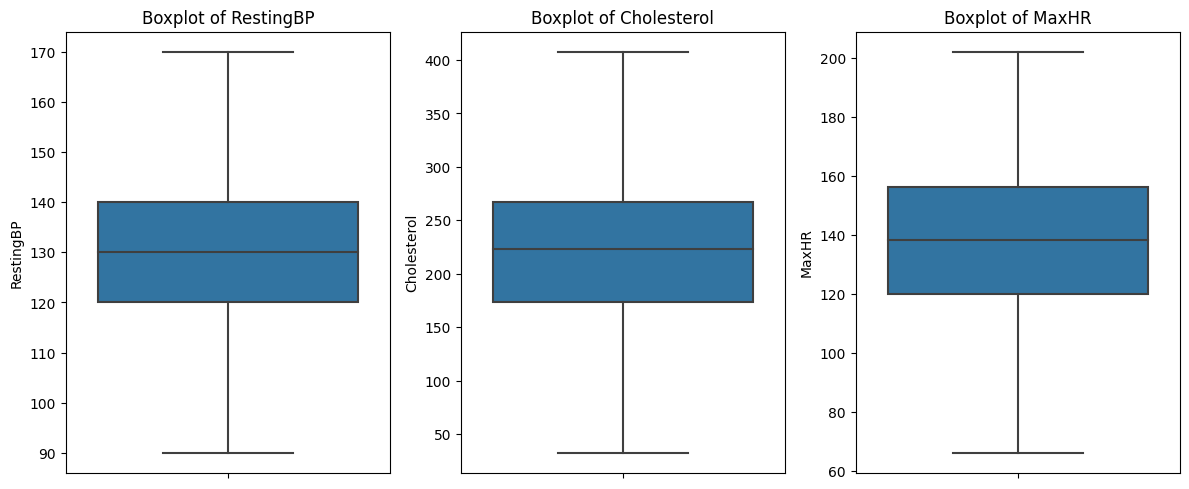

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns = ['RestingBP', 'Cholesterol', 'MaxHR']

# Create subplots
plt.figure(figsize=(12, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

# Display the plots
plt.tight_layout()
plt.show()


In [74]:
from scipy.stats.mstats import winsorize

# Apply Winsorization at 5% and 95% percentiles
df['Oldpeak'] = winsorize(df['Oldpeak'], limits=[0.05, 0.05])  # Capping top & bottom 5%


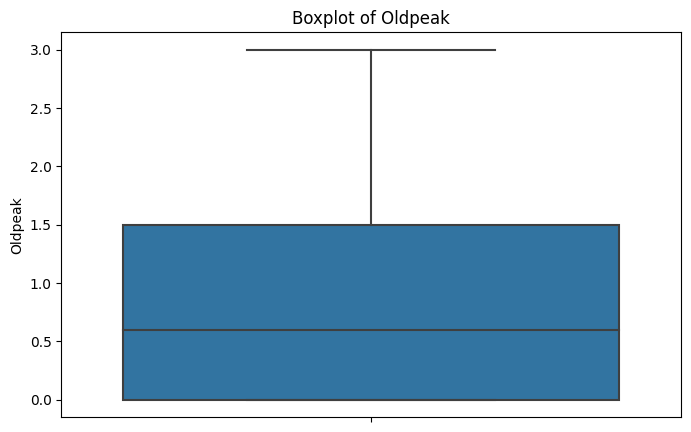

In [75]:
plt.figure(figsize=(8, 5))

# Create a boxplot for Oldpeak
sns.boxplot(y=df['Oldpeak'])

# Add title
plt.title('Boxplot of Oldpeak')

# Show the plot
plt.show()

In [76]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [77]:
# Convert categorical columns to category type
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df[categorical_cols] = df[categorical_cols].astype('category')

# Convert FastingBS to boolean
df['FastingBS'] = df['FastingBS'].astype(bool)

# Display updated data types
print(df.dtypes)


Age                  int64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object


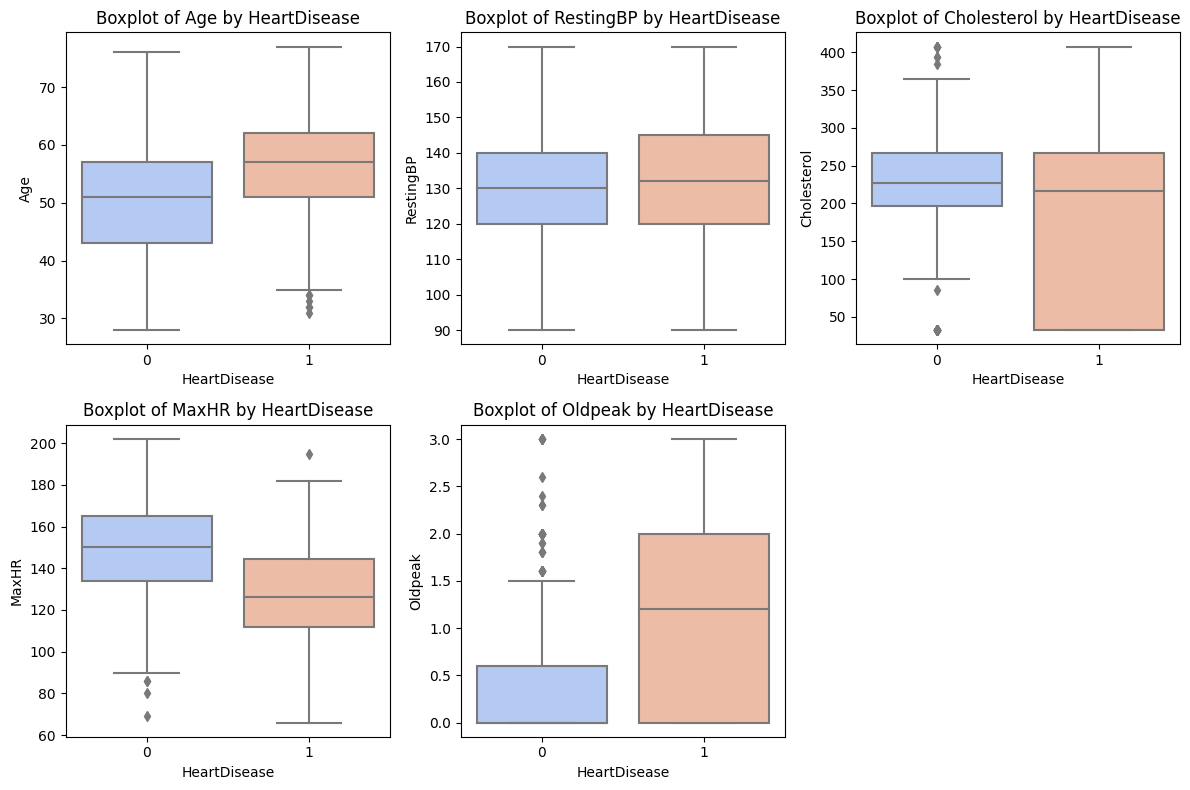

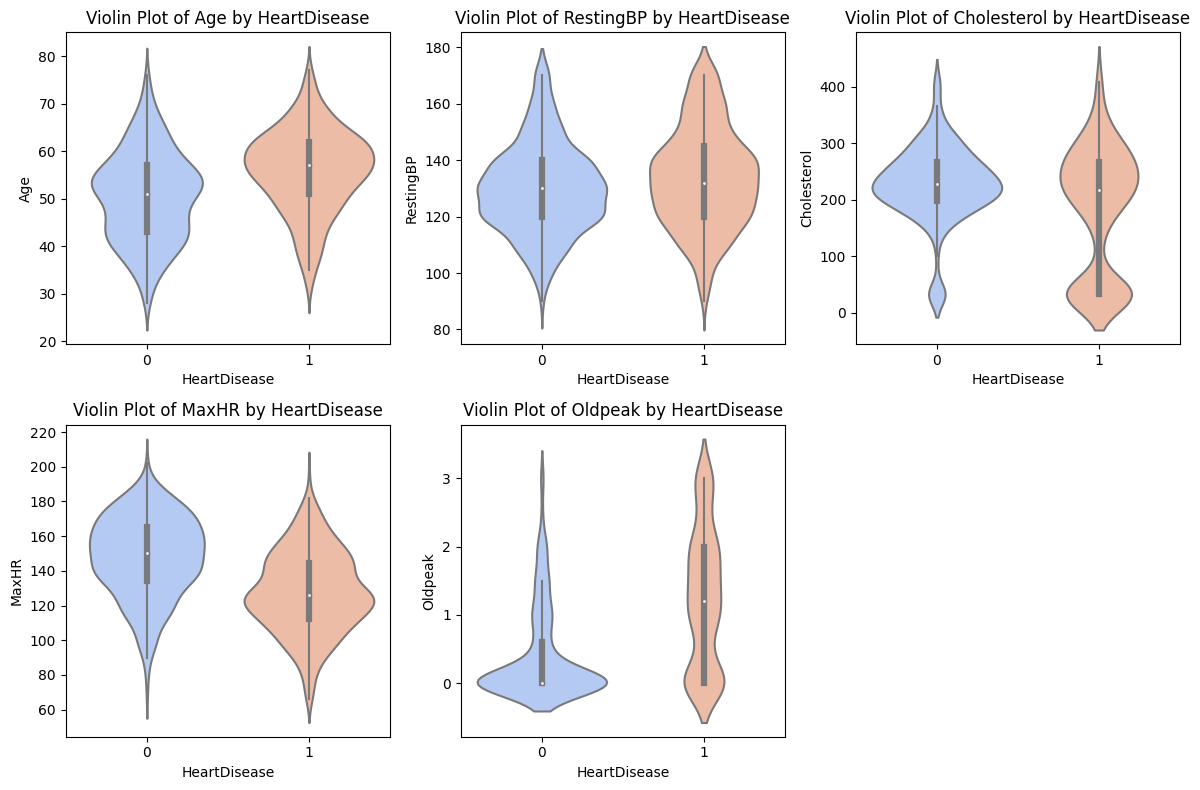

In [78]:
numerical_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["HeartDisease"], y=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col} by HeartDisease")

plt.tight_layout()
plt.show()

# Violin Plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df["HeartDisease"], y=df[col], palette="coolwarm")
    plt.title(f"Violin Plot of {col} by HeartDisease")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

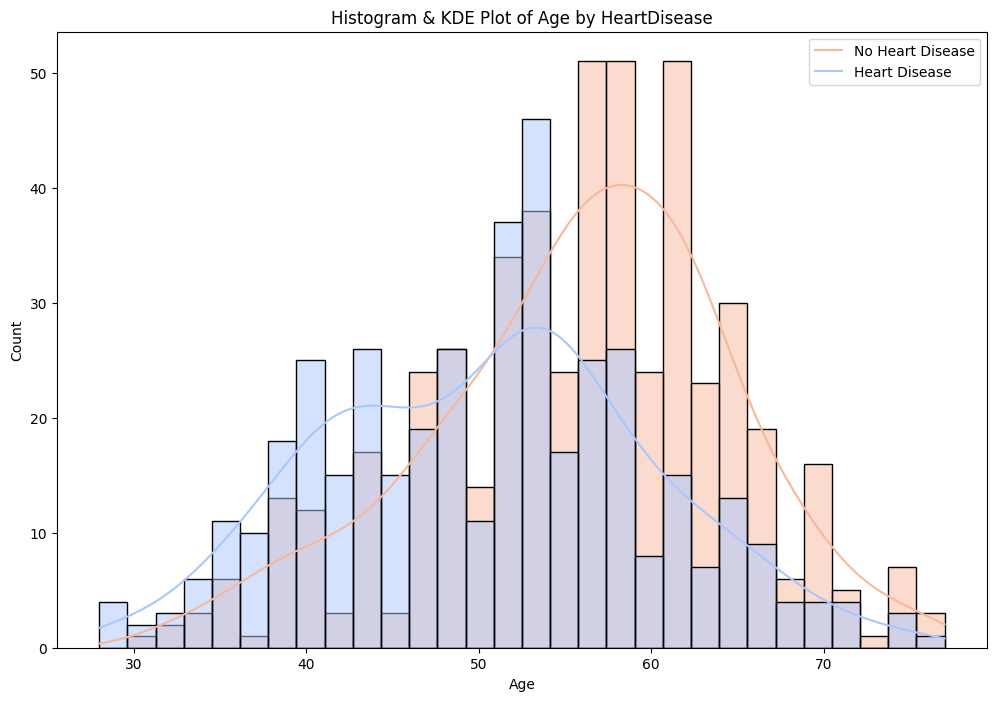

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


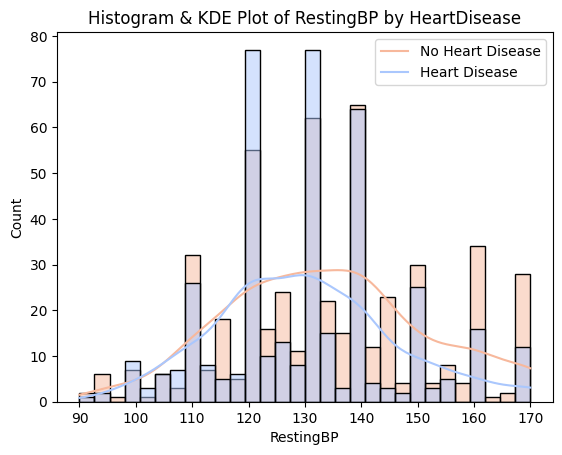

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


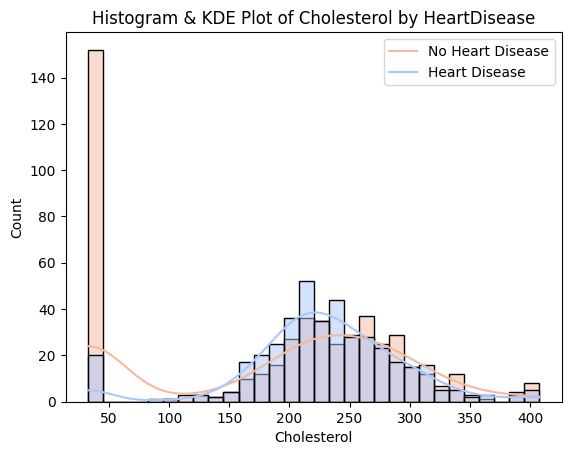

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


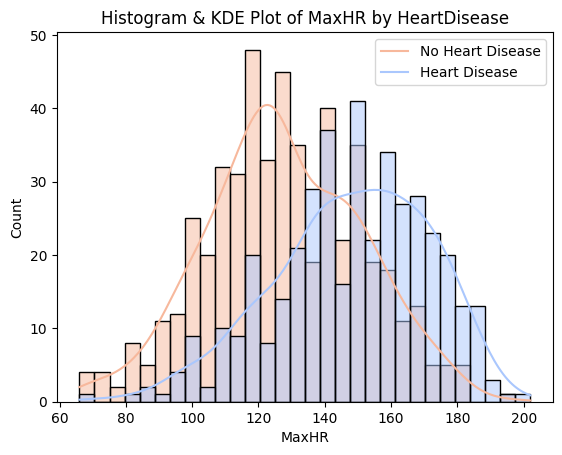

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


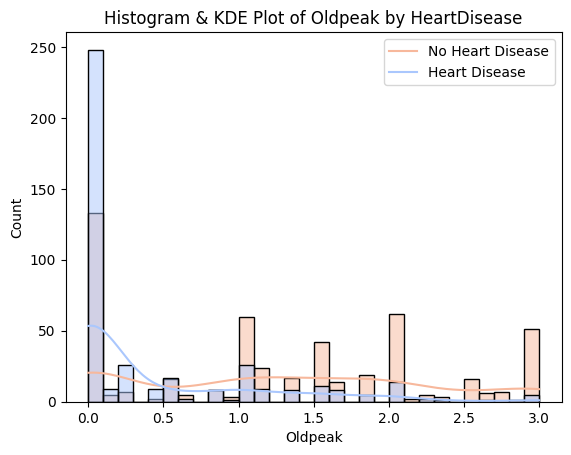

In [79]:
plt.figure(figsize=(12, 8))
for col in numerical_cols:
    sns.histplot(df, x=col, hue="HeartDisease", kde=True, bins=30, palette="coolwarm", alpha=0.5)
    plt.title(f"Histogram & KDE Plot of {col} by HeartDisease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(["No Heart Disease", "Heart Disease"])
    plt.show()


In [80]:
from scipy.stats import ttest_ind 

for col in numerical_cols:
    group1 = df[df["HeartDisease"] == 0][col]
    group2 = df[df["HeartDisease"] == 1][col]
    
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Now it will work
    print(f"T-test for {col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    
#If t-statistic is positive → Group 1 (No Heart Disease) has a higher mean than Group 2 (Heart Disease).
#If t-statistic is negative → Group 2 (Heart Disease) has a higher mean than Group 1 (No Heart Disease).

#it compare the diffrence b/w two groups mean 

T-test for Age: t-statistic = -8.8225, p-value = 0.0000
T-test for RestingBP: t-statistic = -3.4902, p-value = 0.0005
T-test for Cholesterol: t-statistic = 7.3452, p-value = 0.0000
T-test for MaxHR: t-statistic = 13.2324, p-value = 0.0000
T-test for Oldpeak: t-statistic = -15.1204, p-value = 0.0000


In [81]:
"""Age: Older people have a higher risk of heart disease.
RestingBP: People with heart disease tend to have higher blood pressure.
Cholesterol: Unexpectedly, people without heart disease have higher cholesterol.
MaxHR: People with heart disease have lower max heart rates.
Oldpeak: Higher values of Oldpeak are linked to heart disease."""

'Age: Older people have a higher risk of heart disease.\nRestingBP: People with heart disease tend to have higher blood pressure.\nCholesterol: Unexpectedly, people without heart disease have higher cholesterol.\nMaxHR: People with heart disease have lower max heart rates.\nOldpeak: Higher values of Oldpeak are linked to heart disease.'

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


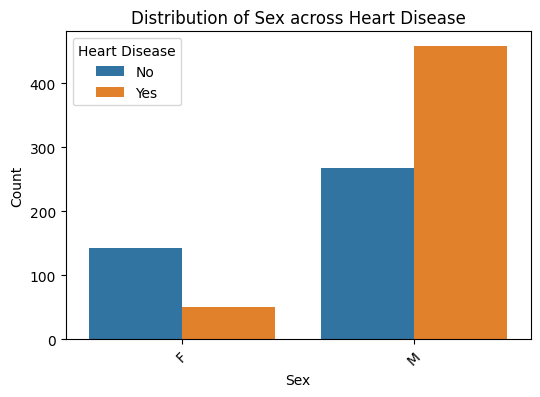

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


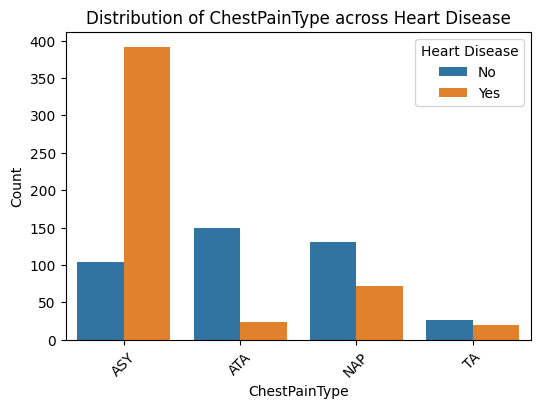

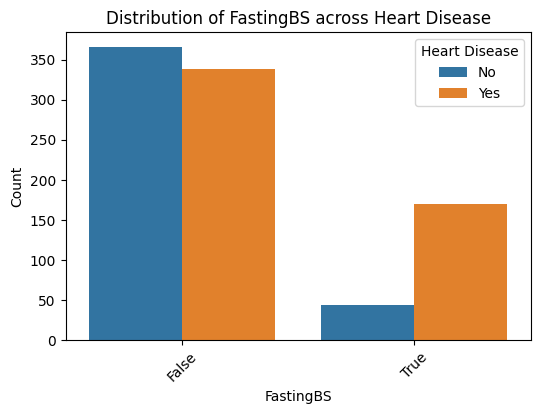

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


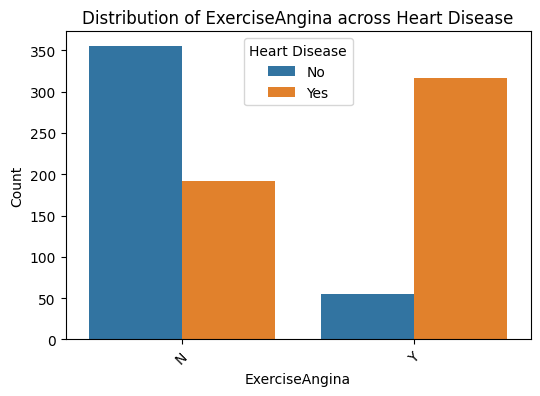

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


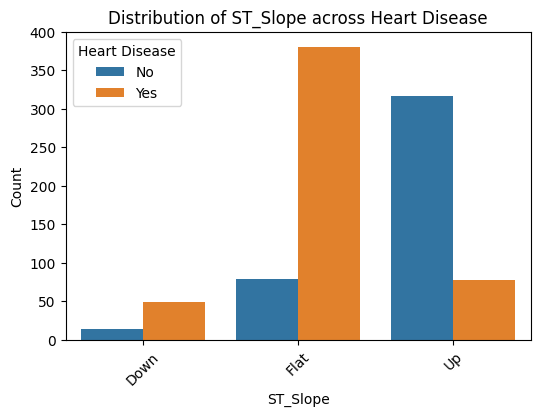

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


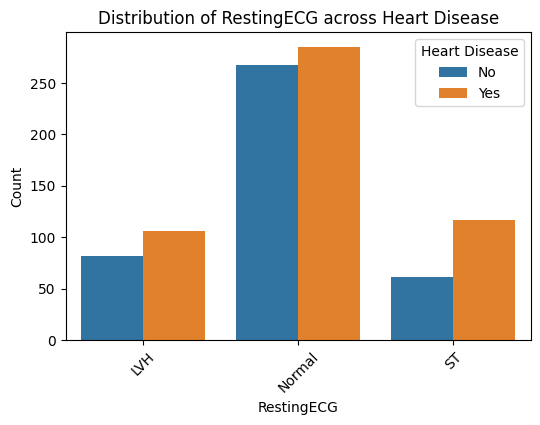

In [82]:
from scipy.stats import chi2_contingency


# Define categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'RestingECG']

# Count Plots & Bar Charts
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'Distribution of {col} across Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

In [83]:
# chi squre test 
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {col}:')
    print(f'Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}')
    print('-' * 40)

Chi-Square Test for Sex:
Chi2 Statistic: 84.15, p-value: 0.0000
----------------------------------------
Chi-Square Test for ChestPainType:
Chi2 Statistic: 268.07, p-value: 0.0000
----------------------------------------
Chi-Square Test for FastingBS:
Chi2 Statistic: 64.32, p-value: 0.0000
----------------------------------------
Chi-Square Test for ExerciseAngina:
Chi2 Statistic: 222.26, p-value: 0.0000
----------------------------------------
Chi-Square Test for ST_Slope:
Chi2 Statistic: 355.92, p-value: 0.0000
----------------------------------------
Chi-Square Test for RestingECG:
Chi2 Statistic: 10.93, p-value: 0.0042
----------------------------------------


In [84]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,False,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,False,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,False,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,False,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,False,Normal,122.0,N,0.0,Up,0


In [85]:
# preprocess the data fro machine learning model .

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoders = {}
binary_cols = ['Sex', 'ExerciseAngina', 'FastingBS', 'RestingECG']
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed



In [86]:
 #One-Hot Encode Multi-Class Categorical Variables
df = pd.get_dummies(df, columns=['ChestPainType', 'ST_Slope'], drop_first=True, dtype = int)

In [87]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,1,172.0,0,0.0,0,1,0,0,0,1
1,49,0,160.0,180.0,0,1,156.0,0,1.0,1,0,1,0,1,0
2,37,1,130.0,283.0,0,2,98.0,0,0.0,0,1,0,0,0,1
3,48,0,138.0,214.0,0,1,108.0,1,1.5,1,0,0,0,1,0
4,54,1,150.0,195.0,0,1,122.0,0,0.0,0,0,1,0,0,1


In [88]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Apply StandardScaler
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


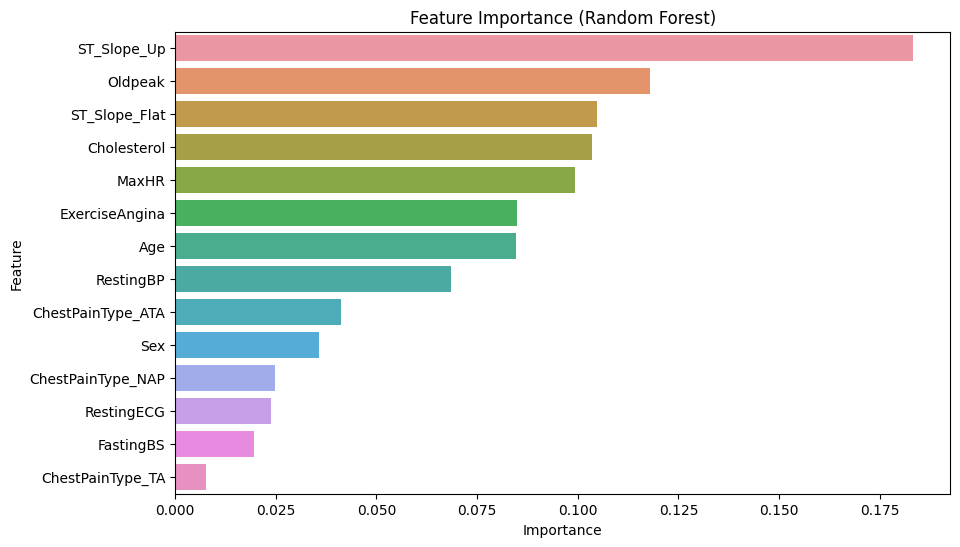

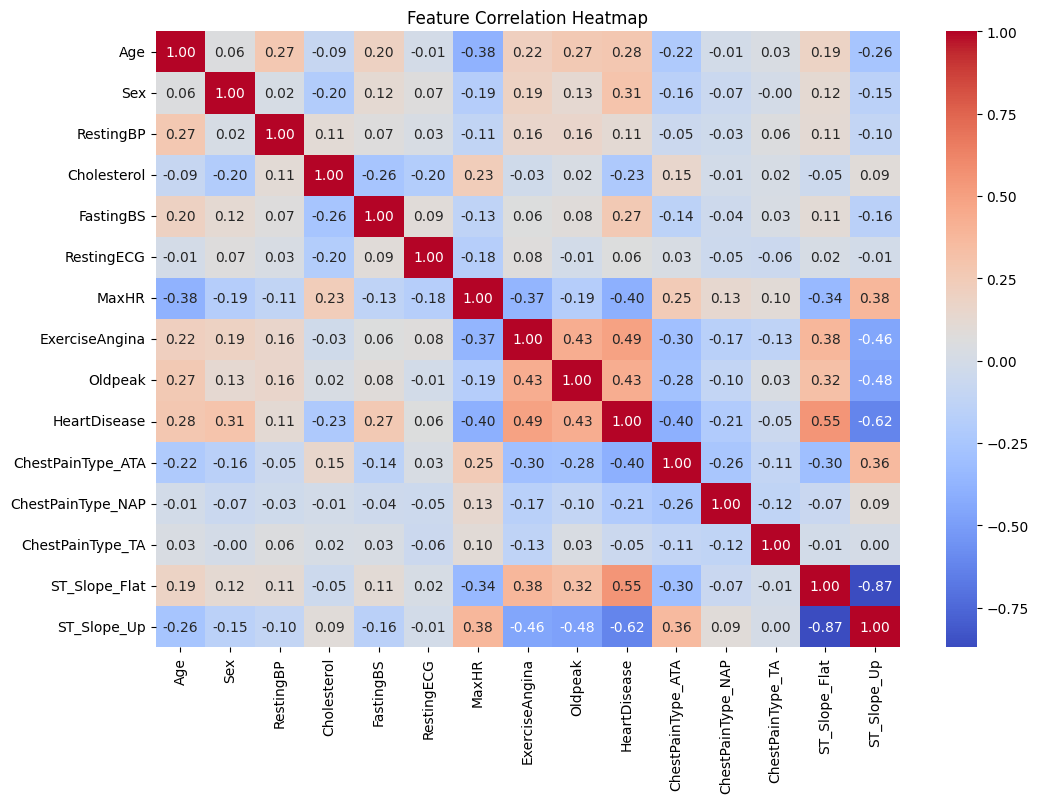

Explained Variance by Each PCA Component: [0.24049239 0.10602505 0.09053199 0.08600462 0.07919301 0.06683597
 0.06302924 0.05832842 0.05452716 0.0437399  0.04315549 0.03125187
 0.02921948]


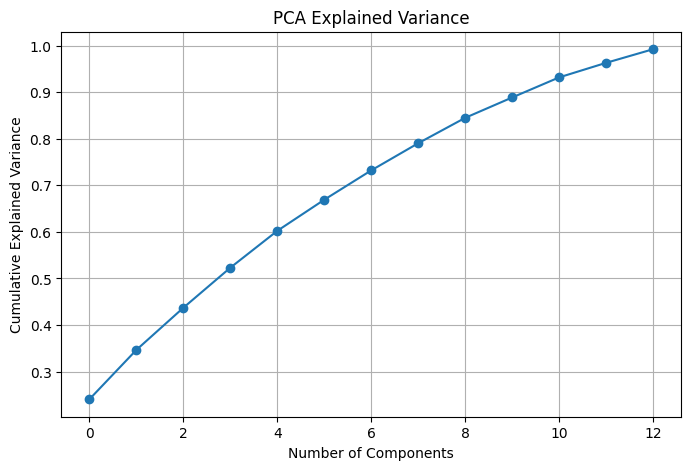

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Splitting into features (x or (All data )) and target (target or y )
x= df.drop(columns=["HeartDisease"])
y = df["HeartDisease"] 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 1. Feature Importance using Random Forest

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance (Random Forest)
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_rf)
plt.title("Feature Importance (Random Forest)")
plt.show()


# 3. Correlation Analysis
# ------------------------ #
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# ------------------------ #
# 4. PCA (Just for Relationship Checking)
# ------------------------ #
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Standardize features

pca = PCA(n_components=13)  # Try reducing to 5 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each PCA Component:", explained_variance)

# Cumulative variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

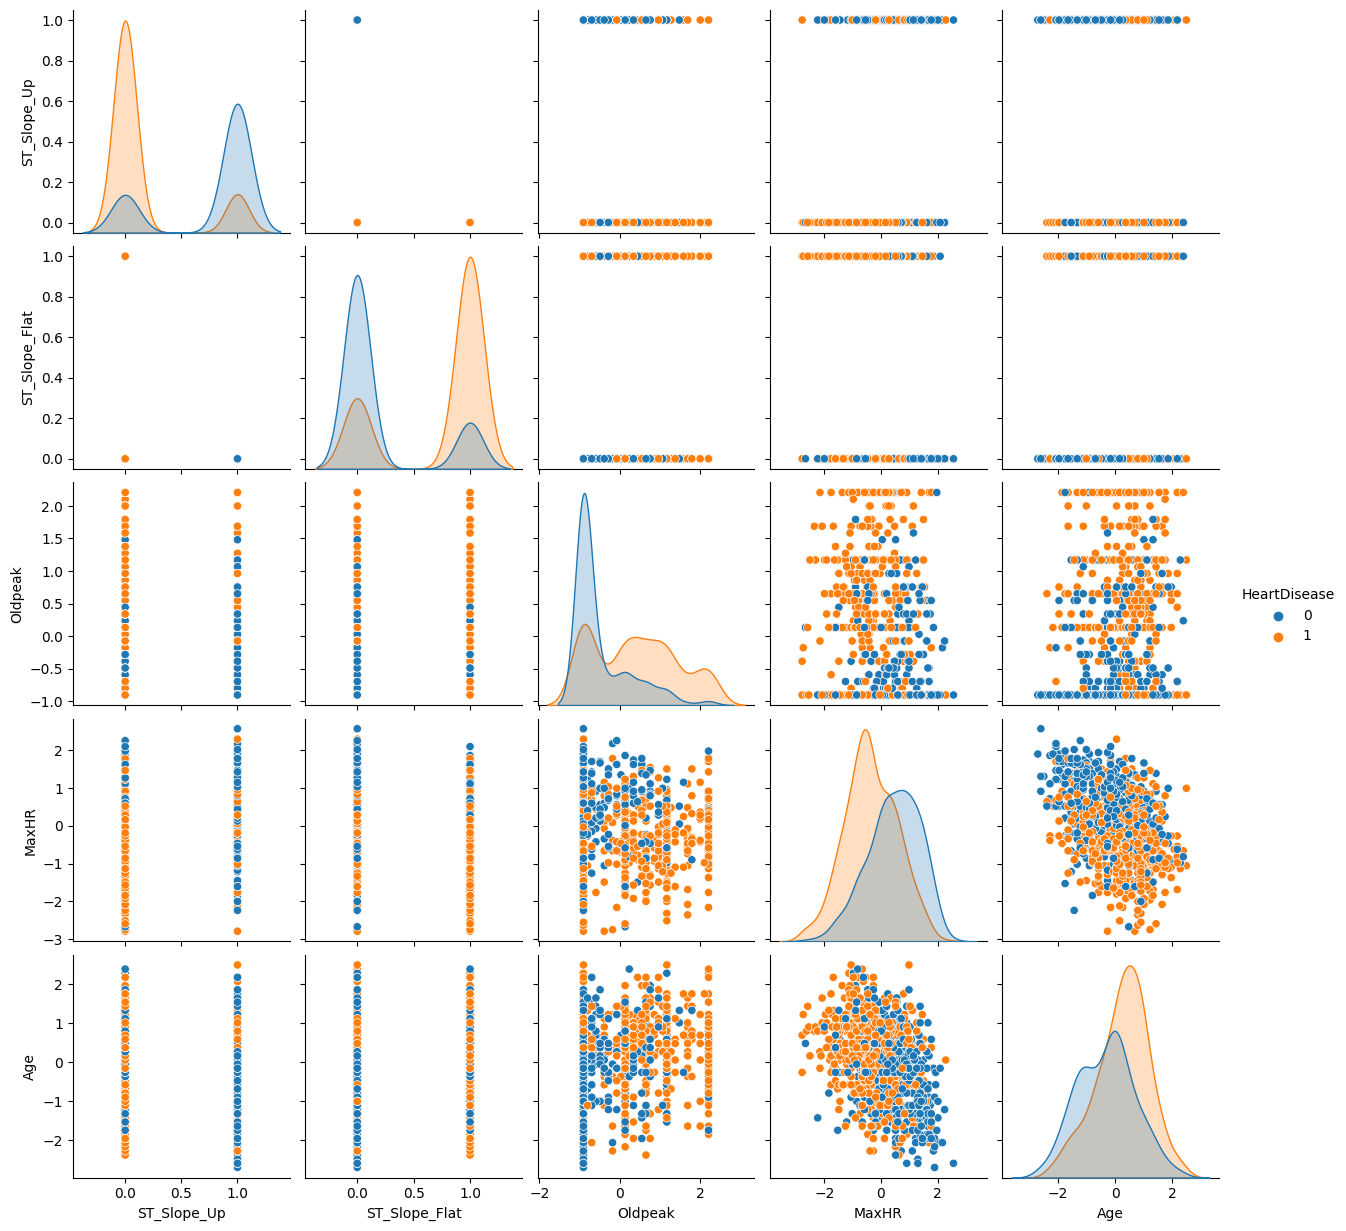

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['ST_Slope_Up', 'ST_Slope_Flat', 'Oldpeak', 'MaxHR', 'Age']
sns.pairplot(df, hue='HeartDisease', vars=selected_features, diag_kind='kde')
plt.show()


In [91]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.463654,0.886771,0,1,1.384080,0,-0.905208,0,1,0,0,0,1
1,-0.478484,0,1.641229,-0.250184,0,1,0.754610,0,0.131962,1,0,1,0,1,0
2,-1.751359,1,-0.125133,0.824187,0,2,-1.527219,0,-0.905208,0,1,0,0,0,1
3,-0.584556,0,0.345897,0.104463,0,1,-1.133801,1,0.650548,1,0,0,0,1,0
4,0.051881,1,1.052442,-0.093722,0,1,-0.583014,0,-0.905208,0,0,1,0,0,1


Model Accuracies:
SVC: 0.83
Logistic Regression: 0.83
Random Forest: 0.88
XGBoost: 0.90


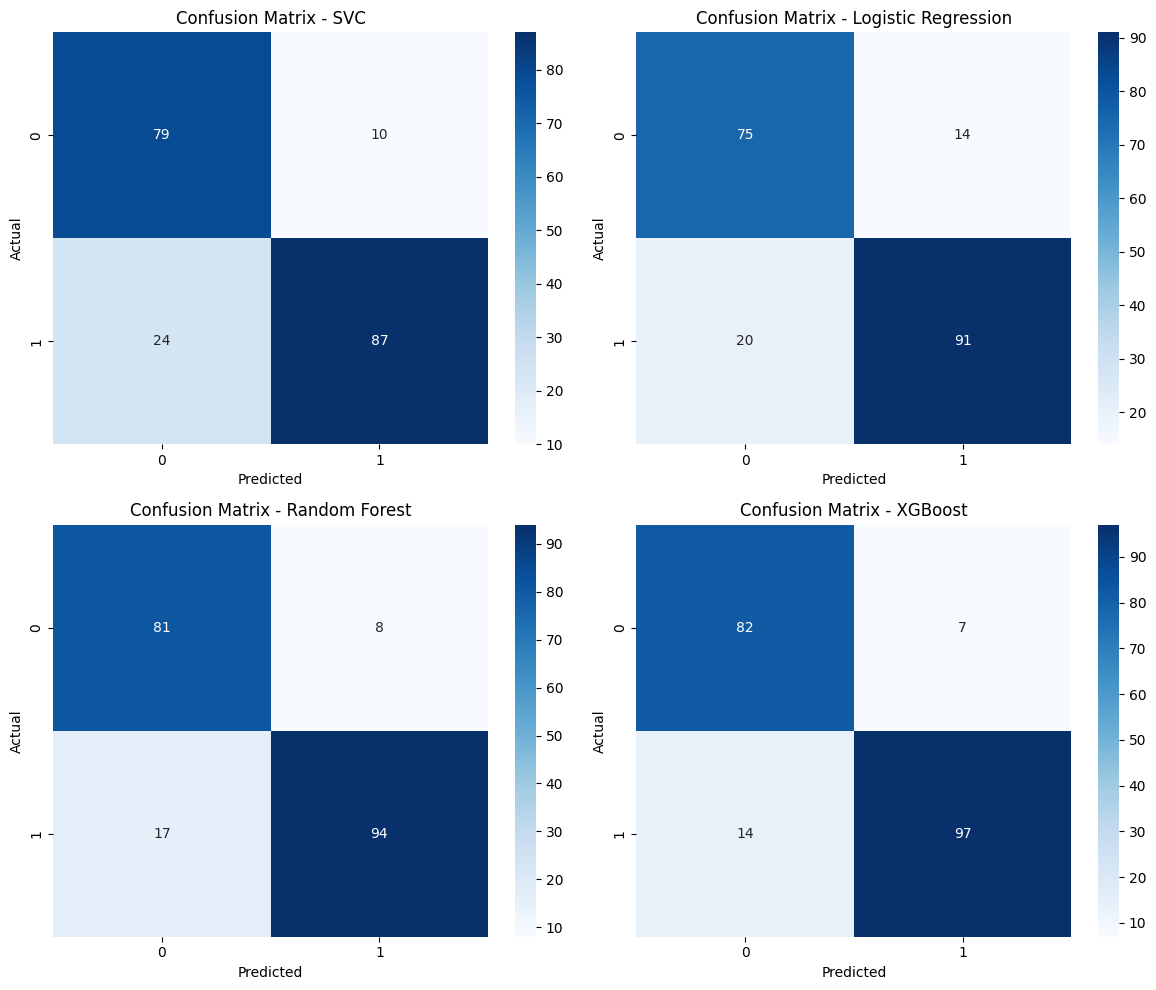

In [92]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate a synthetic dataset for classification
from sklearn.datasets import make_classification
data, labels = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and predict with each model
predictions = {}
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    accuracies[name] = accuracy_score(y_test, y_pred)
    
# Print accuracies
print("Model Accuracies:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.2f}")

# Visualization - Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [94]:
df.to_csv("cleaned_data.csv", index=False)